In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [181]:
data = pd.read_csv('monthly_data_10.csv')
data = data.fillna('')

In [ ]:
"""After removing majority-null and duplicate columns, there are 46 features.
"""

In [233]:
X = data.drop(['raw_target', 'target_encoded', 'product'], axis = 1) #product is already in there unnested
y = binary_target

In [115]:
raw_target = data['raw_target']
binary_target = data['target_encoded'] 

In [258]:
#engineered columns
#redundant info from both columns combined into one
X['product_name'] = X['v2ProductName'].combine_first(X['eventInfo.eventLabel']) 
#extract the deepest split of category (not sure if this can be cut / is already included in pagepath)
X['prod_category'] = pd.Series((s.split('/')[-2] if len(s.split('/')) >=2 else s.split('/')[-1] for s in X['v2ProductCategory'])).replace('${escCatTitle}', '(not provided)')
#encoding pagepath

In [258]:
#columns to drop based on EDA  -- comment once it's been dropped 
# X = X.drop(['eventInfo.eventAction', 'eCommerceAction.action_type'], axis = 1) #data leakage, target info is in there 
# X = X.drop(['productListPosition'], axis = 1) #no info available for add to cart
# X = X.drop(['page.pageTitle', 'page.pagePathLevel1', 'page.pagePathLevel2', 'page.pagePathLevel3'], axis = 1) #redundant with pagePath
# X = X.drop(['eventInfo.eventLabel','v2ProductName'], axis = 1) #combined into product_name

In [114]:
"""When examining the target, there are 13.69% Add to Cart events and 86.31% other events"""

(66514, 46)

,count,percent
raw_target,,
Quickview Click,31025,46.644315
Promotion Click,13014,19.565806
Add to Cart,9107,13.691854
Product Click,7452,11.203656
Onsite Click,4620,6.945906
Remove from Cart,1296,1.948462


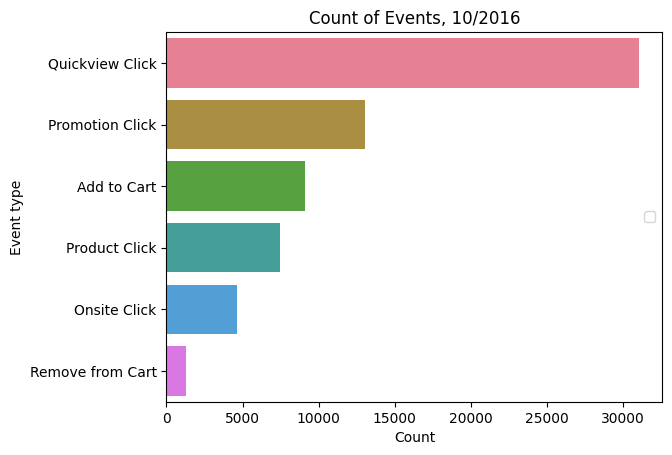

In [111]:
#distribution of events
ax = sns.barplot(y = raw_target.value_counts().index, 
            x = raw_target.value_counts().values, 
            hue = raw_target.value_counts().index , 
            palette = sns.color_palette('husl'), dodge = False)
plt.legend([])
plt.xlabel("Count")
plt.ylabel("Event type")
plt.title("Count of Events, 10/2016")

event_counts = pd.DataFrame(raw_target.value_counts())
event_counts['percent'] = event_counts['count'] /len(raw_target.index)*100
event_counts.head(6)


In [256]:
X.columns

Index(['date', 'visitId', 'productSKU', 'v2ProductName', 'v2ProductCategory',
       'productPrice', 'localProductPrice', 'isClick', 'productListName',
       'hitNumber', 'time', 'hour', 'minute', 'page.pagePath', 'page.hostname',
       'page.pageTitle', 'appInfo.screenName', 'appInfo.landingScreenName',
       'appInfo.exitScreenName', 'eventInfo.eventCategory',
       'eventInfo.eventLabel', 'social.hasSocialSourceReferral',
       'contentGroup.contentGroup2', 'contentGroup.previousContentGroup2',
       'source', 'browser', 'operatingSystem', 'isMobile', 'deviceCategory',
       'continent', 'subContinent', 'country', 'region', 'metro', 'city',
       'networkDomain', 'hits', 'pageviews', 'timeOnSite', 'newVisits',
       'product_name'],
      dtype='object')

In [250]:
X['product_name'] = X['v2ProductName'].combine_first(X['eventInfo.eventLabel'])

In [231]:
data['raw_target'][data['page.pageTitle'] == 'Home'].unique()

array(['Promotion Click', 'Onsite Click'], dtype=object)

In [217]:
X[['page.pageTitle', 'page.pagePath', 'page.pagePathLevel1', 'page.pagePathLevel2', 'page.pagePathLevel3', 'v2ProductCategory',]][X['v2ProductCategory'] == '${escCatTitle}']

,page.pageTitle,page.pagePath,page.pagePathLevel1,page.pagePathLevel2,page.pagePathLevel3,v2ProductCategory
87,Store search results,/asearch.html,/asearch.html,,,${escCatTitle}
144,Store search results,/asearch.html,/asearch.html,,,${escCatTitle}
147,Google Men's Zip Hoodie,/google+redesign/apparel/mens+outerwear/google...,/google+redesign/,/apparel/,/mens+outerwear/,${escCatTitle}
174,Store search results,/asearch.html,/asearch.html,,,${escCatTitle}
175,Store search results,/asearch.html,/asearch.html,,,${escCatTitle}
...,...,...,...,...,...,...
66456,Store search results,/asearch.html,/asearch.html,,,${escCatTitle}
66457,Store search results,/asearch.html,/asearch.html,,,${escCatTitle}
66490,Store search results,/asearch.html,/asearch.html,,,${escCatTitle}
66493,Store search results,/asearch.html,/asearch.html,,,${escCatTitle}


In [227]:
X[['prod_category', 'page.pageTitle', 'v2ProductName']]

,prod_category,page.pageTitle,v2ProductName
0,,Home,
1,,Home,
2,,Home,
3,,Home,
4,,Home,
...,...,...,...
66509,Bags,Bags | Google Merchandise Store,Waterproof Backpack
66510,Fun,Fun | Accessories | Google Merchandise Store,Google Sunglasses
66511,Fun,Fun | Accessories | Google Merchandise Store,Fashion Sunglasses & Pouch
66512,Women's,Women's Apparel | Google Merchandise Store,Google Women's Fleece Hoodie


In [208]:
X['prod_category'] = pd.Series((s.split('/')[-2] if len(s.split('/')) >=2 else s.split('/')[-1] for s in X['v2ProductCategory'])).replace('${escCatTitle}', '(not provided)')

Text(0.5, 1.0, 'Product Category Distribution, 10/2016')

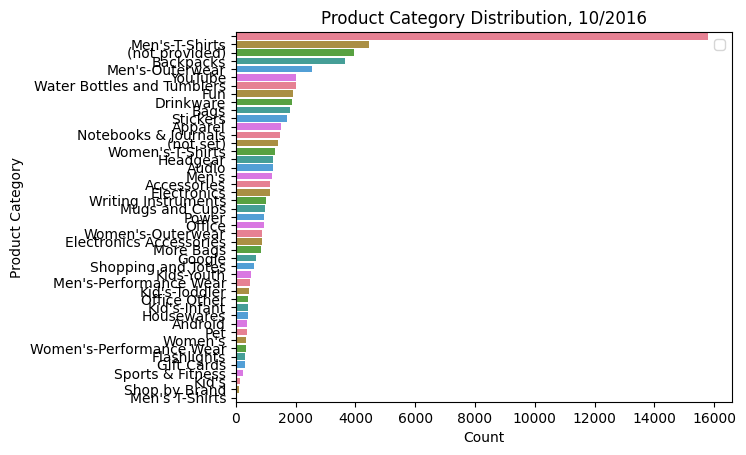

In [210]:
plt.plot(figsize = (20,20))
sns.barplot(y = X['prod_category'].value_counts().index, 
            x = X['prod_category'].value_counts().values, 
            hue = X['prod_category'].value_counts().index , 
            palette = sns.color_palette('husl'), dodge = False)
plt.legend([])
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.title("Product Category Distribution, 10/2016")

In [117]:
temp_x = X['timeOnSite']

In [118]:
sitetime = pd.concat([temp_x, raw_target], axis = 1)

In [118]:
"""
Longer time on site for add to cart and remove from cart compared to other events.
Seems like this may be good for distinguishing cart actions from other events but not for distinguishing between add and remove
"""

Text(0.5, 1.02, '*Outliers excluded')

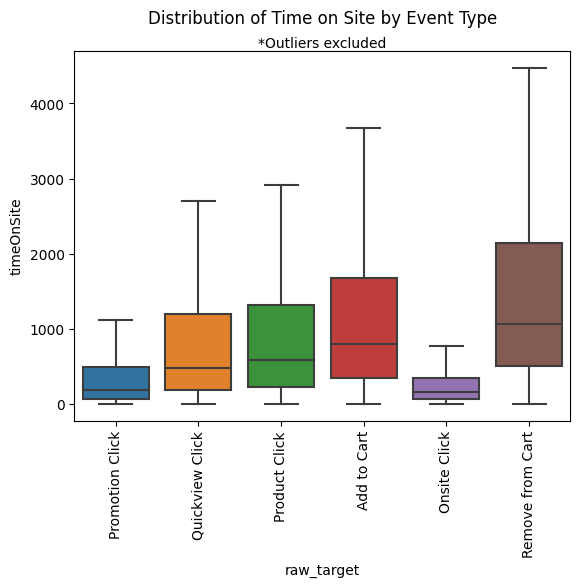

In [159]:
sns.boxplot(x=raw_target, y = X['timeOnSite'], showfliers = False)
plt.xticks(rotation = 90)
plt.title("Distribution of Time on Site by Event Type", pad = 20)
plt.text(0.5, 1.02, '*Outliers excluded', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
